Notebook to analyze where in the distortion space performance drops to chance levels.

In [3]:
import src.d04_analysis.distortion_performance_composite as dpc
import src.d00_utils.functions as functions
import src.d00_utils.definitions as definitions
from pathlib import Path
import numpy as np

In [4]:
class PseudoArgs(object):  # created because argparse does not seem to play nicely with Jupyter notebooks, and I need an argparse-like object for functions.get_config(args)

    def __init__(self, _config_dir, _config_filename):
        self.config_dir = _config_dir
        self.config_name = _config_filename

config_dir = str(Path(definitions.ROOT_DIR, 'image-quality-for-deep-learning', 'src', 'd04_analysis', 'composite_performance_configs'))
config_filename = 'pl_dn161_fr_mega1_mega2_composite.yml'
num_classes = 365
# config_filename = 's6_oct_composite_config.yml'

args_passed = PseudoArgs(config_dir, config_filename)

config = functions.get_config(args_passed)
cp, output_dir = dpc.get_composite_performance_result(config=config)

{
   "identifier": "composite-result-test",
   "parent_dir": "default",
   "overwrite_extracted_props": true,
   "performance_prediction_result_ids": [
      "0024-rlt-0020-densenet161-full_range_best_loss-0006-tst-r_fr_pl-b_fr_pl-n_fr_pl_noise:v0"
   ],
   "performance_eval_result_ids": [
      "0022-rlt-0020-densenet161-full_range_best_loss-0008-tst-full_range_mega_set_2_noise:v0"
   ]
}


In [5]:
def get_chance_performance_bins(_cp, threshold):
    res_values, blur_values, noise_values, perf_3d, distortion_array, perf_array, __ = _cp.get_3d_distortion_perf_props(distortion_ids=('res', 'blur', 'noise'), predict_eval_flag='eval')
    _chance_indices = np.where(perf_array <= threshold)[0]
    _chance_distortion_points = distortion_array[_chance_indices, :]
    return _chance_indices, _chance_distortion_points, perf_array, res_values, blur_values, noise_values

In [6]:
_threshold = 1.5 * (1 / num_classes)
chance_inds, chance_distortion_points, _perf_array, _res_vals, _blur_vals, _noise_vals = get_chance_performance_bins(cp, threshold=_threshold)

loading existing processed properties


In [7]:
print(chance_distortion_points)

[[ 0.09765625  0.835      48.        ]
 [ 0.09765625  1.325      50.        ]
 [ 0.09765625  1.57       34.        ]
 [ 0.09765625  1.815      24.        ]
 [ 0.09765625  1.815      42.        ]
 [ 0.09765625  2.06       16.        ]
 [ 0.09765625  2.06       44.        ]
 [ 0.09765625  2.06       48.        ]
 [ 0.09765625  2.305      36.        ]
 [ 0.09765625  2.55       20.        ]
 [ 0.09765625  2.55       34.        ]
 [ 0.09765625  2.55       50.        ]
 [ 0.09765625  2.795      16.        ]
 [ 0.09765625  2.795      38.        ]
 [ 0.09765625  2.795      42.        ]
 [ 0.09765625  2.795      46.        ]
 [ 0.09765625  3.04       22.        ]
 [ 0.09765625  3.04       32.        ]
 [ 0.09765625  3.04       44.        ]
 [ 0.09765625  3.04       46.        ]
 [ 0.09765625  3.285       8.        ]
 [ 0.09765625  3.285      30.        ]
 [ 0.09765625  3.285      32.        ]
 [ 0.09765625  3.285      40.        ]
 [ 0.09765625  3.285      44.        ]
 [ 0.09765625  3.53      

In [8]:
_perf_values = np.unique(_perf_array)

In [9]:
_perf_values[:10]

array([0.        , 0.01136364, 0.01176471, 0.01204819, 0.01234568,
       0.0125    , 0.01282051, 0.01298701, 0.01315789, 0.01333333],
      dtype=float32)

In [10]:
deltas = [_perf_values[i+1] - _perf_values[i] for i in range(len(_perf_values[:100]) - 1)]
num_dist_points = len(_perf_array)
dist_point_match = num_dist_points == len(_res_vals) * len(_blur_vals) * len(_noise_vals)
print('dist point match:', dist_point_match)
mean_samples = len(np.ravel(cp.top_1_vec)) / num_dist_points
single_image_delta = 1 / mean_samples
# print(deltas)

dist point match: True


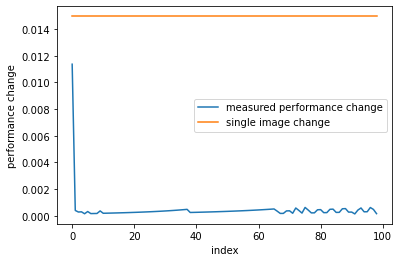

In [11]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(deltas, label='measured performance change')
plt.plot(single_image_delta * np.ones_like(deltas), label='single image change')
plt.xlabel('index')
plt.ylabel('performance change')
plt.legend()
plt.show()

In [12]:
top_1 = cp.top_1_vec
top_1_predict = cp.top_1_vec_predict

acc_eval = np.mean(top_1)
acc_predict = np.mean(top_1_predict)
print(acc_predict, acc_eval)

0.26372465753424656 0.26739178082191783


In [13]:
np.mean(_perf_array)

0.2646738

In [10]:
top_1 = cp.top_1_vec
top_1_predict = cp.top_1_vec_predict

acc_eval = np.mean(top_1)
acc_predict = np.mean(top_1_predict)
print(acc_predict, acc_eval)

0.8758225308641975 0.8582731481481481


In [11]:
np.mean(_perf_array)

0.8523784